## Pranav Mechineni 

# Exploring the Heart Disease Phenomenon

# Table of Contents
1. Introduction
2. Library Importation
3. Data Wrangling
4. Exploratory Data Analysis
5. Conclusion
6. Resources

## 1. Introduction

WOW! You might've just had a heart attack or maybe your loved one had a heart attack. Maybe you saw your favorite character in your favorite TV show get a heart attack and now you're worried about your parents. No matter what your reasoning, Heart Disease is a phenomenon that was the leading cause of death in 2015 for men AND women. In this exercise we're going to go through some possible causes for heart disease and understand the correlation between these causes and heart disease. We will be looking at the relationships between heart disease and the variables contained in the dataset that we will talk about later. We want to know the worst causes of heart disease so we can try to prevent it ourselves and live! .

Overall, we will be going over processing a csv dataset file from kaggle and 
eventually seeing what the most correlated causes to heart disease there are.

# 2. Library Importation and Python

*If you haven't used python before I suggest going to resources to look at the tutorials!*
Here we import and have installed all these libraries on our local machine so we can go ahead 
and use them for our data wrangling. You will need Python 3 and everything in the box under to properly go through the code and steps further in. I have made it so that you can just copy paste all the code in and it will install what you need to work as well.

In [1]:
!pip install plotly
!pip install geopandas
!pip install matplotlib
!pip install pandas
!pip install numpy
import seaborn as sns
import geopandas
import pandas as panda
import numpy as nump
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import spearmanr

# 3. Data Wrangling

Here we scrape the dataset from the .csv file to get as much information as we can so we can later manipulate it. Furthermore, we attempt to drop data that has missing entries but it actually turns out in this specific dataset there aren't any NaN values. This means that there's simply nothing to drop but we use .dropna() anyway. This is a function that will drop any missing entries in your data. Furthermore, if you wanted to look if there is something in your data that you do need to clean, (your_data_frame_here).isna().sum() will give you the total number of missing entries. Our orig_table variable stores all the data from our heart disease dataset. 

In [2]:
##We use the heart.csv dataset and use .read_csv to get our data and store it in our orig_table variable
orig_table = panda.read_csv('heart.csv')

## This shows us that there is actually 0 missing entries
empty_entries = orig_table.isna().sum()
## Here we print out that there is 0 missing entries in every column of our table and data type which is an int
empty_entries

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We take a look at a 5 random datapoints in our dataset to get a feel for what information we have in our table. (.sample(*input number of random datapoints wanted*))
Furthermore, we also drop any data that has missing entries or invalid entries so we dont jeopardize our data when we retrieve it later. 
There isnt any in this dataset but if you ever do this again in your data science career,this step should be done in some way shape or form to clean your data. If you don't clean your data then you will run into problems when trying to access it later. *VERY IMPORTANT*

In [3]:
#.dropna() gets rid of all missing/null/nan values
orig_table = orig_table.dropna()
orig_table.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0


Rearranging columns to look better for us as we work as well as makes accessing it easier (Tidying the data). As you can see there are multiple columns and it even goes up to 289 in this specific example. You should get the same numbers are you are using this dataset. 
In the next step we make sure that every column is accounted for after we edit it.

In [4]:
orig_table = orig_table[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','sex', 
               'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]
orig_table

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,63,145,233,150,2.3,1,3,1,0,0,0,0,1,1
1,37,130,250,187,3.5,1,2,0,1,0,0,0,2,1
2,41,130,204,172,1.4,0,1,0,0,0,2,0,2,1
3,56,120,236,178,0.8,1,1,0,1,0,2,0,2,1
4,57,120,354,163,0.6,0,0,0,1,1,2,0,2,1
5,57,140,192,148,0.4,1,0,0,1,0,1,0,1,1
6,56,140,294,153,1.3,0,1,0,0,0,1,0,2,1
7,44,120,263,173,0.0,1,1,0,1,0,2,0,3,1
8,52,172,199,162,0.5,1,2,1,1,0,2,0,3,1
9,57,150,168,174,1.6,1,2,0,1,0,2,0,2,1


In [5]:
#Just in case I missed something I check again for null values after every time I edit the table
#This is so that if I messed up somewhere editing the table, we can see our mistakes and change our
#code right away
orig_table.isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
sex         0
cp          0
fbs         0
restecg     0
exang       0
slope       0
ca          0
thal        0
target      0
dtype: int64

Earlier when we printed the entire table after I edited it, we saw that there was 303 rows by 14 columns. When dealing with extremely large datasets, this is inefficient as you will end up having a lot of unnecessary data crowding your screen. If we use .shape() on our dataframe then we will automatically get a return in this format (rows, columns). A shortcut if you will!

In [6]:
# To specify how many datapoints we have, we can use shape to get the number of rows and columns
# This means there are a total of 303 rows of data in our dataset and 14 columns of different 
# types of data as we saw from tables above
orig_table.shape

(303, 14)

In [7]:
## Now we want more detail about the dataset we are analyzing so we can use multiple functions to understand what's going on.
#listing all columns of our dataset
all_columns = list(orig_table.columns)
all_columns

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'target']

One of the best ways to understand the data you are wrangling is to use the .info function. This will make it so that you get multiple useful pieces of information all in once little function so you don't have to specify everytime. You can just use this function ONCE and get what you need. This could be understood as abstraction since you don't need to show specifics parts of code to anybody, can just use a singular function.

In [8]:
orig_table.info 

<bound method DataFrame.info of      age  trestbps  chol  thalach  oldpeak  sex  cp  fbs  restecg  exang  \
0     63       145   233      150      2.3    1   3    1        0      0   
1     37       130   250      187      3.5    1   2    0        1      0   
2     41       130   204      172      1.4    0   1    0        0      0   
3     56       120   236      178      0.8    1   1    0        1      0   
4     57       120   354      163      0.6    0   0    0        1      1   
..   ...       ...   ...      ...      ...  ...  ..  ...      ...    ...   
298   57       140   241      123      0.2    0   0    0        1      1   
299   45       110   264      132      1.2    1   3    0        1      0   
300   68       144   193      141      3.4    1   0    1        1      0   
301   57       130   131      115      1.2    1   0    0        1      1   
302   57       130   236      174      0.0    0   1    0        0      0   

     slope  ca  thal  target  
0        0   0     1    

In order to manipulate the data how we want in any dataset we must know the exact type in each incase we need to retrieve types such as a string or an int but in this case it's int and a float. Using .dtypes on each variable/columns allows us to see what is expected in each one as well as makes it easy for us to understand what we need to parse/retrieve later.

In [9]:
orig_table.dtypes

age           int64
trestbps      int64
chol          int64
thalach       int64
oldpeak     float64
sex           int64
cp            int64
fbs           int64
restecg       int64
exang         int64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## 4. Exploratory Data Analysis/VIsualization

What we want from this section is to be able to compare different attributes with those who have heart disease so we can try to understand what exactly the correlation between them all are.

Our first example can be from the sex of the patients of the dataset. 
Through this data outputted in the next box we can see that targets(0:no heart disease and 1: heart disease), has sex which are (0:female and 1:male), and we get the specific number of each gender. Using this we can just use simple math to calculate how many males and females there are.
From here we can understand that there is a total of 96 females and 207 males

In [10]:
## Our first example can be from the sex/targets of the patients of the dataset. 
orig_table.groupby('target')['sex'].value_counts()

target  sex
0       1      114
        0       24
1       1       93
        0       72
Name: sex, dtype: int64

However, there is 24 total females without heart disease and 72 with heart disease
On the other hand, there are 114 males without heart disease and 93 with heart disease
We also just learned that there is much more males than females in the dataset as well which 
we will look at later in the project
In total, about 45.5% of patients don't have heart disease
On the other hand, about 54.5% of patients do have heart disease
This information was just from using the calculator and our previous labeling of the chart.
138/303 = without heart disease
165/303 = with heart disease

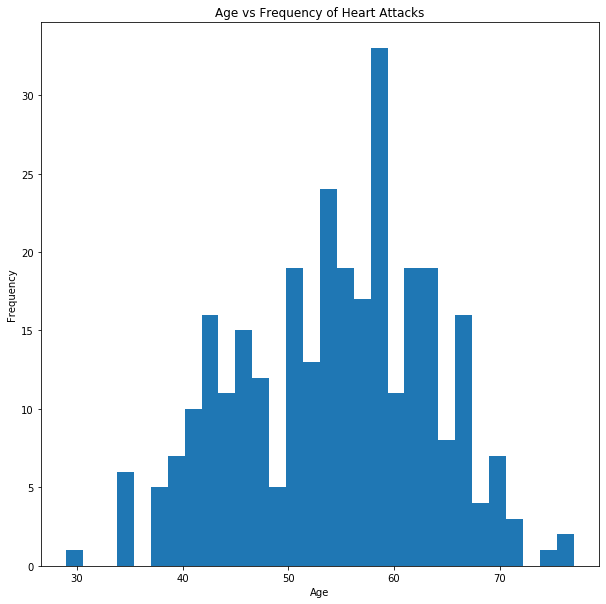

In [11]:
#Now we can use our original dataset and simply plot a histogram for half the columns possible 
#I didn't do it on every column because I'm sure you get the gist from the examples below.
#This data works well for some histograms and horribly for others but that's just the name of the game
#when dealing with data that doesn't have the same range of values
orig_table.age.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Age vs Frequency of Heart Attacks')
plt.xlabel('Age') 
plt.show()

We can see from this graph here that most of these patients peak around the 40-48 area and 50-56 area. The positive patients are honestly have a significant increase around the 40-50 area so if we see in future plots/information of a 40-50 year old we can assume that they are more likely than the other patients to have a heart disease. Usually you believe that there's going to be more heart disease for the later ages such as the 60-70 range. You could also argue that those who live that late are going to be healthier since they got that old without any other problem anyway. Yes this is a little dark but that's life man.

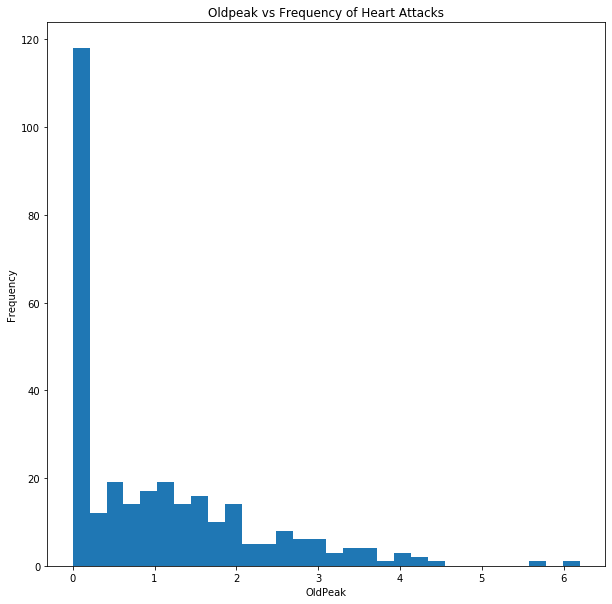

In [12]:
orig_table.oldpeak.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Oldpeak vs Frequency of Heart Attacks')
plt.xlabel('OldPeak') 
plt.show()
## Plot for OLDPEAK columns

We can see here that when there is 0 oldpeak, there is going to be the highest rate of heart disease. Thus those with higher OldPeak we are assuming that they are exercising so they have less chance of heart disease.

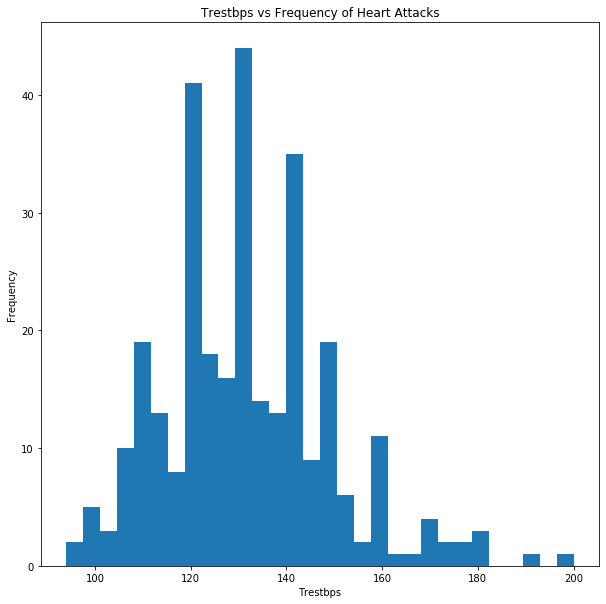

In [13]:
orig_table.trestbps.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Trestbps vs Frequency of Heart Attacks')
plt.xlabel('Trestbps (mm Hg)') 
plt.show()
## Plot for TRESTBPS column

Given the plotted data, there is a strong correlation between having a higher chance of a heart attack with resting blood pressure within the 120-160 range. This indicates that people with faster resting blood pressure have a higher risk of having a heart attack. The range from 160-200 has very little data because this is a heavy extreme range that most people physically cannot under, given that this implies imminent death.

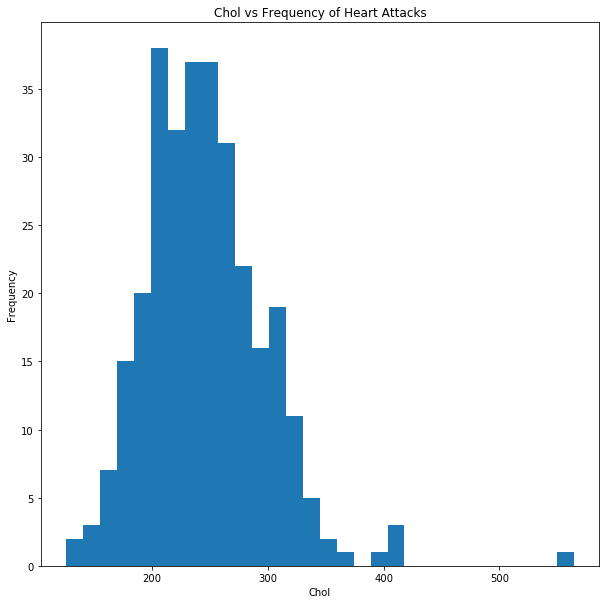

In [14]:
orig_table.chol.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Chol vs Frequency of Heart Attacks')
plt.xlabel('Chol (mg/dL)') 
plt.show()
## Plot for CHOL column

Given the plotted data, it is shown that people who fall under the 150-350 mg/dL range for cholesterol have a higher chance of having a heart attack. The relation between higher concentrations of cholesterol does have a positive correlation to a higher frequency risks of heart attacks, with 250 mg/dL peaking at roughly 37%. It starts to decline after 250 mg/dL because any higher typically isn't very likely to obtain.Again, the range from 400-600 mg/dL is the far extreme range that people physically cannot fall under, meaning that 350 mg/dL would realisitcally be the "upper bound" for this specific scenario.

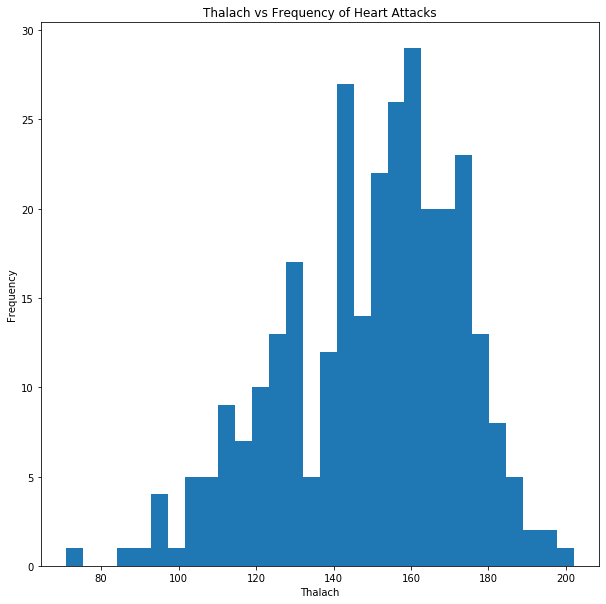

In [15]:
orig_table.thalach.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Thalach vs Frequency of Heart Attacks')
plt.xlabel('Thalach (BPM)') 
plt.show()
## Plot for THALACH column

The given plot shows a strong positive correlation between Thalach(maximum heart rate achieve) and heart attack likelihood. As you can see, the range between 100-170 BPM shows that those who have higher maximum heart rates have a higher likelihood of sustaining a heart attack, with the likelihood of a heart attack increasing as Thalach increases. The peak occurs at 160 BPM at 29%, indicating that this around this range, people are most likely to sustain a heart attack. Similar to the previous charts, the range past 180 BPM, the higher extreme, has almost no data because it is an extreme range that most people physically cannot fall under, given the imminent threat of death if one were to fall under this category.

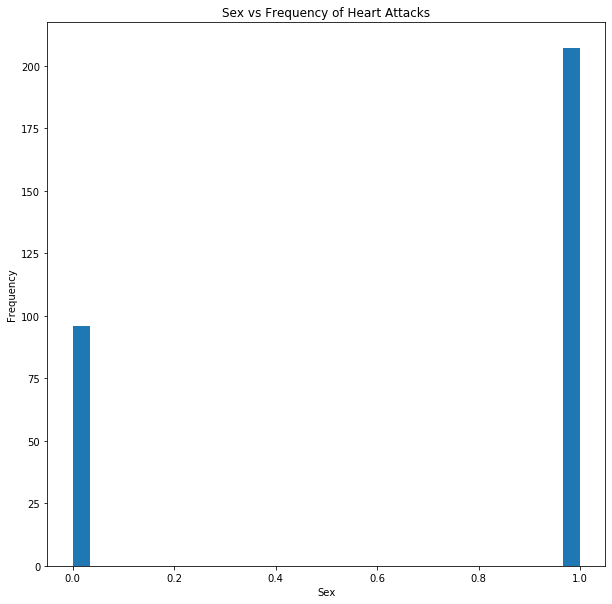

In [16]:
orig_table.sex.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Sex vs Frequency of Heart Attacks')
plt.xlabel('Sex (0 = Female 1 = Male)') 
plt.show()
## Plot for SEX column

The given plot indicates that men are twice as likely to sustain a heart attack than women are. This is likely due to implications that men live lifestyles that are more unhealthy in comparison to women, thus showing that they are twice as likely to sustain heart attacks.

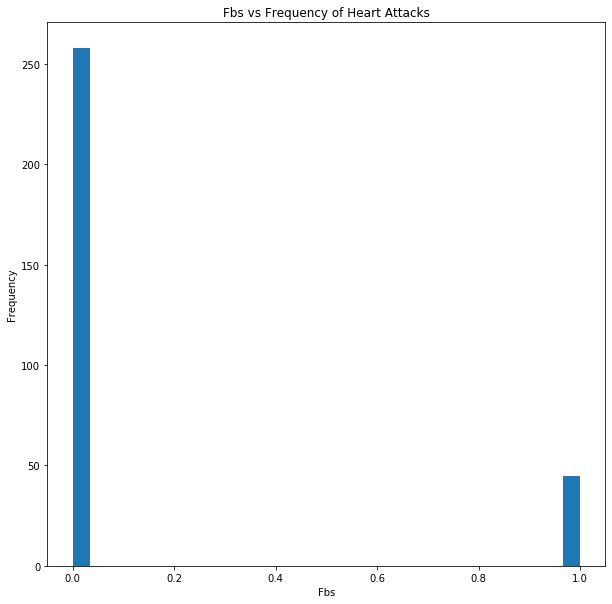

In [17]:
orig_table.fbs.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Fbs vs Frequency of Heart Attacks')
plt.xlabel('Fbs (mg/dL) (fasting blood sugar > 120 mg/dl 0 = false; 1 = true)') 
plt.show()
## Plot for FBS column

The given chart indicates if you have a fasting blood sugar level that is lower than 120 mg/dl, you have a higher ~500% higher likeihood of sustaining a heart attack, whereas the the liklihood of having a fasting blood sugar level of higher than 120 mg/dL has a significantly lower chance of sustaining a heart attack. This is typically in relation to those with diabetes, indicating that those who are above the threshold, you are less likely to sustain a heart attack because of of the lack of dependence of insulin.

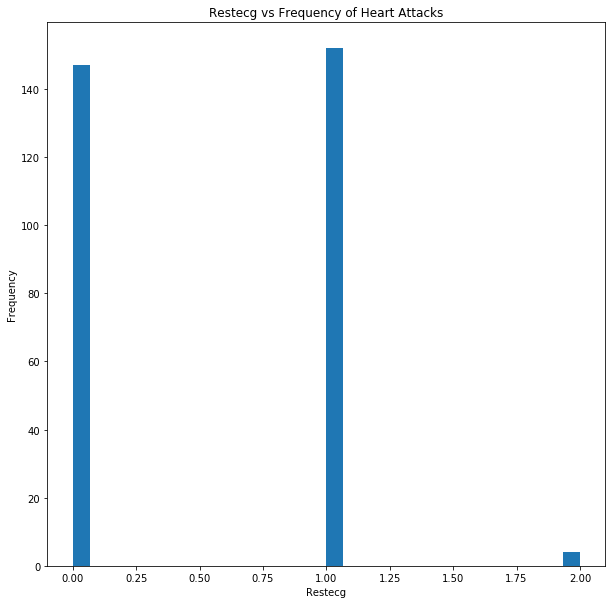

In [18]:
orig_table.restecg.plot(kind="hist",bins=30,figsize=(10,10))
plt.title('Restecg vs Frequency of Heart Attacks')
plt.xlabel('Restecg') 
plt.show()
## Plot for restecg column

We can see from this data that some of our columns such as age and trestbps look like they correlate with heart attacks. 
Columns such as sex, fbs are binary and don't really show anything through this.
Through these histograms, we can tell that our data can possibly correlate but it isn't precise
for all variables.

### We now want to go deeper into some of these columns to take a look at the possible correlation between them and heart attacks

## For this example, let's take a look a few means for our dataset

The mean of thal is at 2.3135313531353137


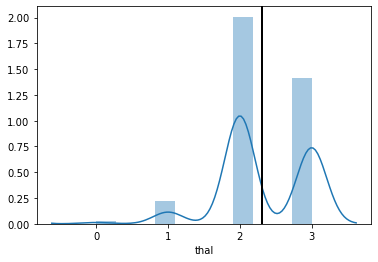

In [19]:
sns.distplot(a=orig_table['thal'])
plt.axvline(orig_table['thal'].mean(), color="black", linewidth=2)
print('The mean of thal is at {}'.format(orig_table['thal'].mean()))

Taking a look at this data, there looks like theres clear correlation once the thal is high. 
However, we could essentially plot this for every single variable and still not understand the real correlation.
Remember, causation doesnt equal correlation.

The mean of cp is at 0.966996699669967


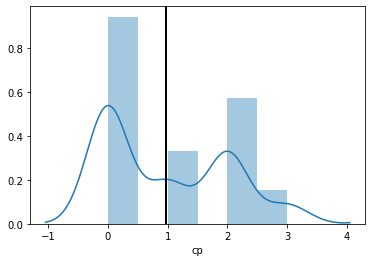

In [20]:
sns.distplot(a=orig_table['cp'])
plt.axvline(orig_table['cp'].mean(), color="black", linewidth=2)
print('The mean of cp is at {}'.format(orig_table['cp'].mean()))

Now for this one, there seems to be a variety of options and it doesnt look too straight forward as the data before.

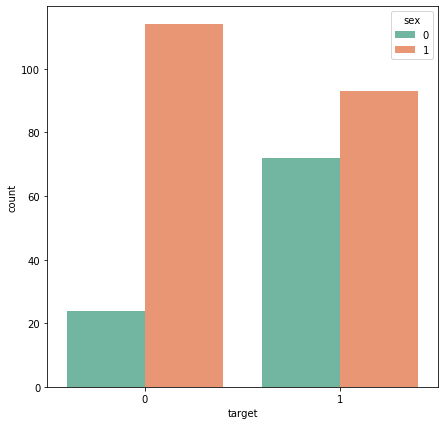

In [21]:
## In this plot we are able to graph our findings from the data wrangling in a bar graph
## We seperate our x axis by those who have and don't have heart disease (target)
sns.set_palette("dark")
a, lol = plt.subplots(figsize=(7, 7))
lol = sns.countplot(x="target (0= no disease, 1= disease)", hue="sex", data=orig_table, palette="Set2")
plt.show()

In [ ]:
From the given plot, the data indicates that under the category of "no disease," the men count outweight the female count by almost 6x. However, for those who do have the disease, men are also outweighing the women as well. This shows that men are more likely to have have heart disease compared to women, while also showing a high count of having no hear

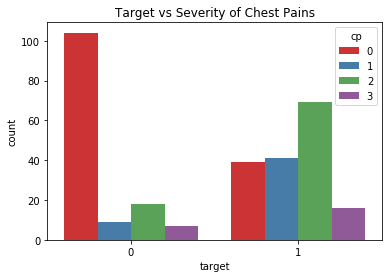

In [22]:
sns.countplot(x='target', hue= 'cp',data = orig_table, palette="Set1")
plt.title('Target vs Severity of Chest Pains')
plt.show()

From the given plot, it appears that those that have heart disease(target = 1) end up having chest pain that is mainly levels 1-2. On the other hand, those without heart disease(target = 0) don't usually end up having chest pains

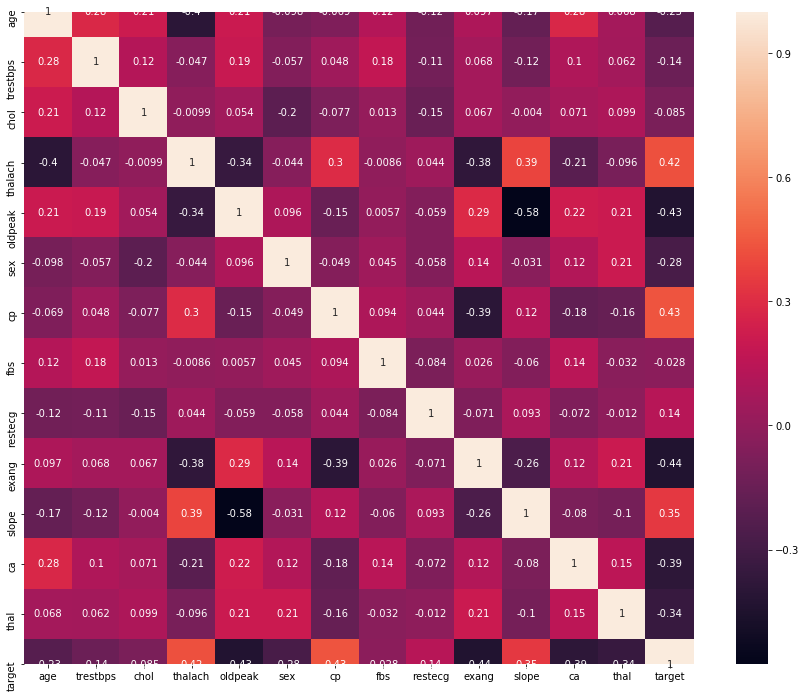

In [24]:
## Furthermore we can actually plot the correlation between all the columns possible
## instead of comparing pairs of columns at the same time.
#visualize the correlation
plt.figure(figsize=(15,12))
sns.heatmap(orig_table.corr(), annot=True)
plt.show()

From this visualization there's actually a positive correlation for chest pains,slope, and thalach
and the target as well as there is a negative correlation for gender, age, oldpeak, and more
These correlations let us understand what really is affecting the possibility of heart disease

### Due to all the possible correlation we will use Pearsons Correlation Coefficient to see if we can understand the relationship between the variables and heart disease

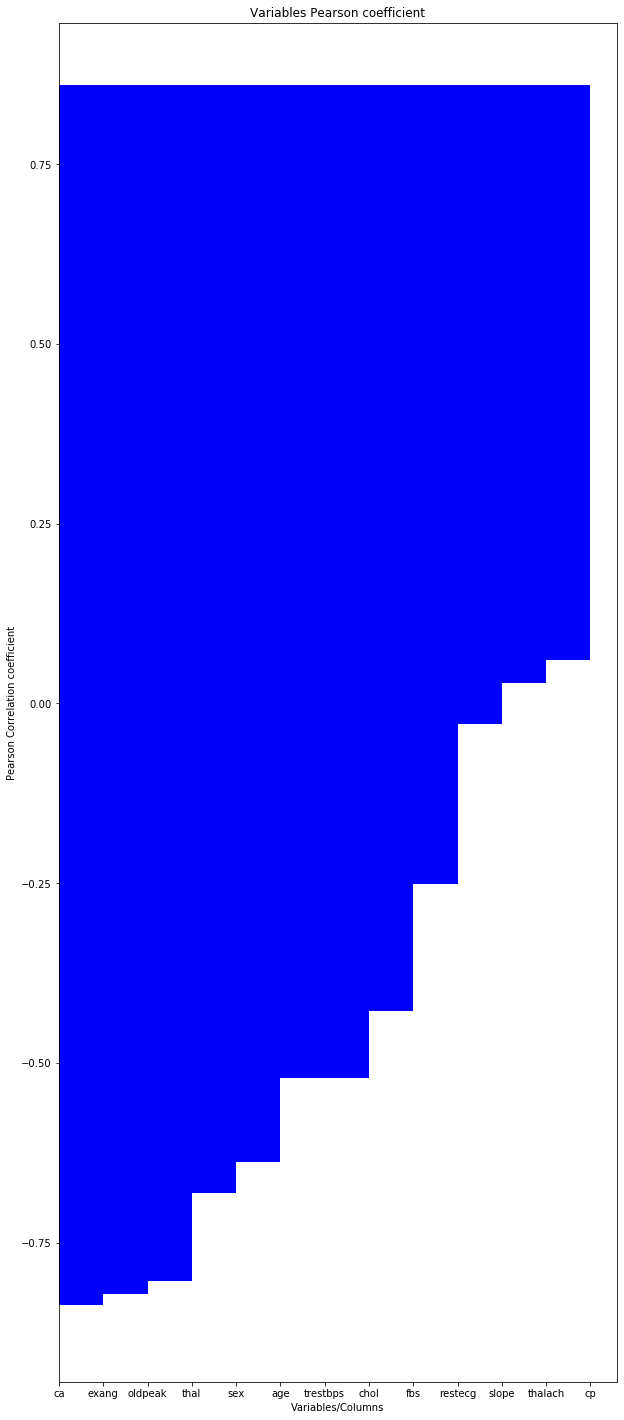

array([-0.45760748, -0.43675708, -0.42148706, -0.40329932, -0.28093658,
       -0.23840007, -0.12159275, -0.12088824, -0.02804576,  0.14861154,
        0.37146048,  0.42836989,  0.46086018])

In [25]:
axee = []
values = []
for col in orig_table.columns:
    if col not in ["target"]:
        axee.append(col)
        values.append(spearmanr(orig_table[col].values, orig_table["target"].values)[0])
duhf = panda.DataFrame({'corr_values':values, 'col_labels':axee})
duhf = duhf.sort_values(by='corr_values')
ind = nump.arange(duhf.shape[0])
width = 1.0
fig, axees = plt.subplots(figsize=(10,25))
rects = axees.barh(nump.array(duhf.corr_values.values), ind, color='b')
axees.set_xticks(ind)
axees.set_xticklabels(duhf.col_labels.values, rotation='horizontal')
axees.set_ylabel("Pearson Correlation coefficient")
axees.set_xlabel("Variables/Columns", rotation='horizontal')
axees.set_title("Variables Pearson coefficient")
plt.show()
nump.array(duhf.corr_values.values)

## Pearson Correlation Coefficient and Conclusion

For those that don't know, Pearson’s correlation coefficient is the essentially a test that measures the statistical relationship between multiple variables. The correlation coefficient uses a specific method of covariance that gives the best results of correlation possible. You can get information of the correlation as well as the variable's relationship in where the graph might be heading as well.
We believe that there is a linear relationship between some of the variables and if there was a heart attack or not. THe scores can range from -1 to 1, the closer to 0 the value is the less the association between the variables. In fact, most of the data that is further away from 0 is more correlated together. Thus, we can see from the data that the ca(number of major vessels colored by flourospy), exang, oldpeak, thal, cp, thalach are actually correlated. Now the visualization of the data is a little off, however I printed the data after and those that are closer to .5 which is ca, exang, oldpeak, thal, cp, and thalach, create a moderate positive relationship between the target and the themselves. Thus, There is indeed a positive relationship. Our goal was to find the causes of heart attack that we could prove are correlated. Now we have proven those that are most closely correlated, however the other variables might as well due to their score but the closer to 0 they are, the less probable. I hope you learned something from this project and I also hope you think more about taking care of yourself and where you are at risk for maybe your loved one is at risk from heart disease :).


## 6. Resources

Dataset: The most popular Heart Disease post on kaggle
Python Introduction: https://www.w3schools.com/python/python_intro.asp
Specific in Depth Python tutorial for scraping/panda/plotting... https://www.youtube.com/watch?v=WGJJIrtnfpk&t=42183s
